In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import SKDS

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.489053
epoch: 0, lr: 0.01
train loss: 27804.40017361111, val loss: 20305.693359375
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:09.346623
epoch: 10, lr: 0.0025
train loss: 645.3200830530237, val loss: 490.2476501464844
sklearn train metric: 0, sklearn validation metric: 0
test loss: 516.8002319335938
learning time: 0:00:15.824684
sklearn test metric: 
0 



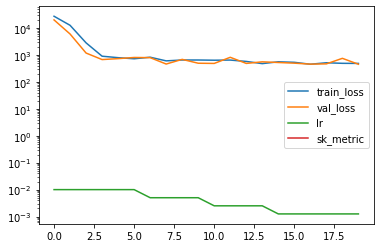

In [2]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:01.073218
epoch: 0, lr: 0.01
train loss: 1531.1171810752467, val loss: 1501.2631530761719
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:10.183926
epoch: 10, lr: 0.01
train loss: 35.359671341745475, val loss: 36.32985973358154
sklearn train metric: 0, sklearn validation metric: 0
test loss: 32.33364486694336
learning time: 0:00:18.363339
sklearn test metric: 
0 



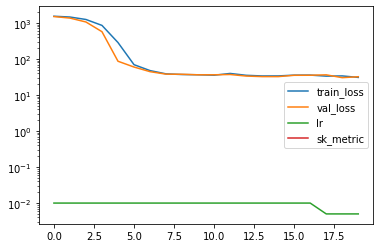

In [3]:
model_params = {'D_in': 23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,None,True)]}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['ae'],
                              'embeds': ['atoms'],
                              'in_file': './data/qm7/qm7.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.698297
epoch: 0, lr: 0.01
train loss: 1562.3007105777137, val loss: 1545.7361755371094
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:07.328589
epoch: 10, lr: 0.01
train loss: 56.453364522833574, val loss: 63.856675148010254
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:13.934223
epoch: 20, lr: 0.01
train loss: 46.98725951345343, val loss: 57.304168701171875
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:20.620370
epoch: 30, lr: 0.005
train loss: 41.32347849795693, val loss: 51.35231113433838
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:27.439415
epoch: 40, lr: 0.0025
train loss: 38.85287776746248, val loss: 53.1608304977417
sklearn train metric: 0, sklearn validation metric: 0
test loss: 50.90915489196777
learning time: 0:00:33.863145
sklearn test metric: 
0 



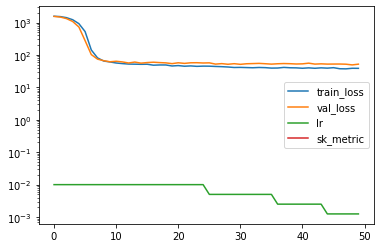

In [4]:
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

In [5]:
#find the longest molecule

ds_params = {'train_params': {'features': ['atNUM'],
                              'pad': None,
                              'targets': [],
                              'embeds': [],
                              'selector': ['opt']}}

qm7x = QM7X(**ds_params['train_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape[0]
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
longest molecule length:  23


(array([6., 1., 1., 1., 1.], dtype=float32), [], [])

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:01.227576
epoch: 0, lr: 0.01
train loss: 66.09199503848427, val loss: 44.608248710632324
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:12.010094
epoch: 10, lr: 0.01
train loss: 2.35999554081967, val loss: 2.101811647415161
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:22.660756
epoch: 20, lr: 0.01
train loss: 2.2117722097196078, val loss: 2.1684582233428955
sklearn train metric: 0, sklearn validation metric: 0


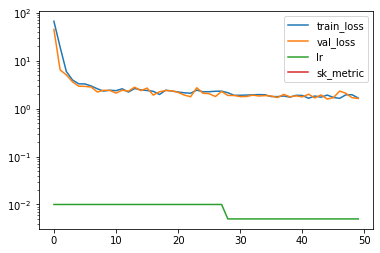

In [6]:
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atNUM',9,64,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'targets': ['eAT'],
                              'embeds': ['atNUM'],
                              'selector': ['opt'],
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

In [ ]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {#'n': 10000, 
                              'features': ['coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': None,
                              'use_pickle': 'qm9.p',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=20)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  10001
QM9 molecules scanned:  20001
QM9 molecules created:  20001
QM9 molecules scanned:  30001
QM9 molecules created:  30001
QM9 molecules scanned:  40001
QM9 molecules created:  40001
QM9 molecules scanned:  50001
QM9 molecules created:  50001
QM9 molecules scanned:  60001
QM9 molecules created:  60001
QM9 molecules scanned:  70001
QM9 molecules created:  70001
QM9 molecules scanned:  80001
QM9 molecules created:  80001
QM9 molecules scanned:  90001
QM9 molecules created:  90001
QM9 molecules scanned:  100001
QM9 molecules created:  100001
QM9 molecules scanned:  110001
QM9 molecules created:  110001
QM9 molecules scanned:  120001
QM9 molecules created:  120001
QM9 molecules scanned:  130001
QM9 molecules created:  130001
total uncharacterized molecules removed:  3054
total QM9 molecules created:  130831
pickling a copy of the QM9 datadic...


In [ ]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': []}

ds_params = {'train_params': {#'n': 10000,
                              'features': ['coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': ('n_atoms','>','18'),
                              'use_pickle': 'n_atoms_greater_than_18.p',
                              'flatten': True}}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=30)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  0
QM9 molecules scanned:  10001
QM9 molecules created:  1853
QM9 molecules scanned:  20001
QM9 molecules created:  4109
QM9 molecules scanned:  30001
QM9 molecules created:  5164
QM9 molecules scanned:  40001
QM9 molecules created:  8487
QM9 molecules scanned:  50001
QM9 molecules created:  10694
QM9 molecules scanned:  60001
QM9 molecules created:  15309
QM9 molecules scanned:  70001
QM9 molecules created:  20609
QM9 molecules scanned:  80001
QM9 molecules created:  25898
QM9 molecules scanned:  90001
QM9 molecules created:  32036
QM9 molecules scanned:  100001
QM9 molecules created:  38581
QM9 molecules scanned:  110001
QM9 molecules created:  46307
QM9 molecules scanned:  120001
QM9 molecules created:  54330
QM9 molecules scanned:  130001
QM9 molecules created:  58020
total uncharacterized molecules removed:  467
total QM9 molecules created:  57590
pickling a copy of the QM9 datadic...


molecules loaded:  1000
molecules loaded:  2000
molecules loaded:  3000
molecules loaded:  3114
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:04.060979
epoch: 0, lr: 0.01
train loss: 564.3921472886029, val loss: 530.186767578125
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:15.555044
epoch: 7, lr: 0.01
train loss: 38.39324603361242, val loss: 42.468177795410156
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:20.399363
epoch: 10, lr: 0.01
train loss: 39.22167519962086, val loss: 35.13230196634928
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:31.913284
epoch: 17, lr: 0.01
train loss: 32.11356398638557, val loss: 35.76101493835449
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:36.881845
epoch: 20, lr: 0.01
train loss: 34.86668036965763, val loss: 40.43260192871094
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:48.250593
ep

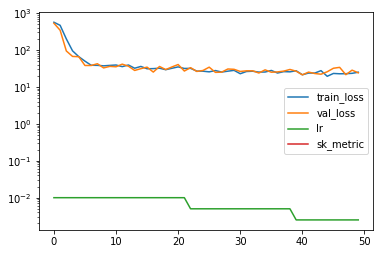

In [2]:
model_params = {'D_in': 63*63+63*32, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atomic_numbers',9,32,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embeds': ['atomic_numbers'],
                              'pad': 63, #length of the longest molecule in the dataset
                              'flatten': True,
                              'criterion': ['wb97x_dz.energy'],
                              'conformation': 'random',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

metrics_params = {'report_interval': 20}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=50)